In [1]:
import pandas as pd
from sklearn import linear_model
import csv
import matplotlib.pyplot as plt
import seaborn as sns
from eyeInfo import EyeInfo
import numpy as np

In [2]:
output = './csv/output/center_20.csv'
train_imput = './csv/center_20_fixed_train_data.csv'
predict_input = './csv/center_20_predict_train_data.csv'

fieldnames = ['screen_x', 'screen_y','left_iris_x','left_iris_y','right_iris_x','right_iris_y']

calib_points = [
    { "x": 200, "y": 200 },
    { "x": 1672, "y": 200 },
    { "x": 936, "y": 472 },
    { "x": 200, "y": 744 },
    { "x": 1672, "y": 744 }
]

In [3]:
def train_to_validate_calib():
    dataset_train_path = train_imput
    dataset_predict_path = predict_input

    data = pd.read_csv(dataset_train_path)

    X = data[['left_iris_x', 'left_iris_y', 'right_iris_x', 'right_iris_y']]
    y = data[['point_x', 'point_y']]

    model = linear_model.LinearRegression()
    model.fit(X, y)

    dados_teste = pd.read_csv(dataset_predict_path)
    eye_positions = dados_teste[['left_iris_x', 'left_iris_y', 'right_iris_x', 'right_iris_y']].values
    previsoes = model.predict(dados_teste)

    combined_predictions = np.concatenate((previsoes, eye_positions), axis=1)
    return combined_predictions.tolist()

def return_scalar(number):
    scalar = []
    scalar.append(number)
    return scalar

In [4]:
teste = train_to_validate_calib()

with open(output, mode='w', newline='') as file:
    writer = csv.DictWriter(file, fieldnames=fieldnames)

    writer.writeheader()

    for row in teste:
        writer.writerow({'screen_x': row[0], 'screen_y': row[1], 'left_iris_x': row[2],'left_iris_y': row[3],'right_iris_x': row[4],'right_iris_y': row[5]})

In [5]:
eye = EyeInfo(calib_points=calib_points, dataset=output)
eye.init_eye()

In [6]:
prediction_df = eye.prediction_df
calib_df = eye.calib_df

       screen_x    screen_y
0   1534.204231  714.228420
1   1534.204231  714.228420
2   1534.204231  714.228420
3   1534.204231  714.228420
4   1534.204231  714.228420
..          ...         ...
95  1521.746197  868.504165
96  1449.399606  883.814717
97  1427.233968  827.211050
98  1400.253558  845.088595
99  1304.492112  848.101964

[100 rows x 2 columns]
   screen_x  screen_y
0       200       200
1      1672       200
2       936       472
3       200       744
4      1672       744


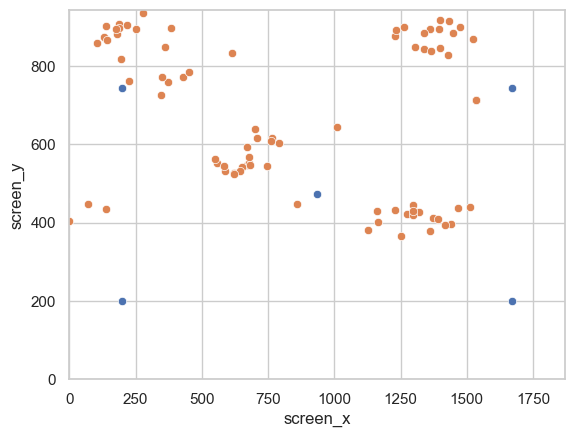

In [7]:
low_lim = 0
sns.set(style="whitegrid")
sns.scatterplot(data=calib_df, x='screen_x', y='screen_y')
sns.scatterplot(data=prediction_df, x='screen_x', y='screen_y')

plt.xlim(low_lim, eye.k_screen_width)
plt.ylim(low_lim, eye.k_screen_height)

plt.show()